In [50]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [16]:
nh3_nc = xr.load_dataset('../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly_lombardia.nc')

In [17]:
nh3 = nh3_nc.agl

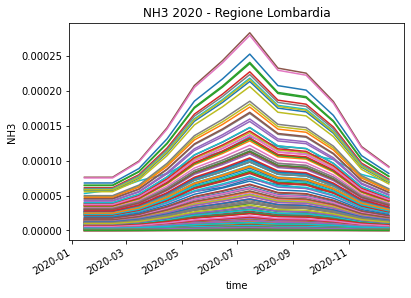

In [36]:
for i in range(len(nh3.lat)):
    for j in range(len(nh3.lon)):
        nh3[:, i, j][-12:].plot()

plt.title('NH3 2020 - Regione Lombardia')
plt.xlabel('time')
plt.ylabel('NH3')
plt.show()

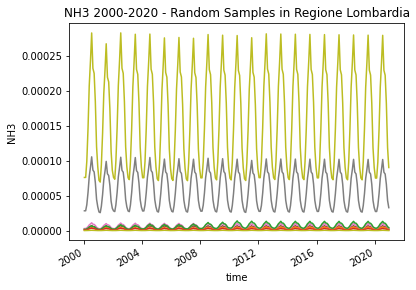

In [41]:
for i in range(0, len(nh3.lat), 6):
    for j in range(0, len(nh3.lon), 6):
        nh3[:, i, j].plot()

plt.title('NH3 2000-2020 - Random Samples in Regione Lombardia')
plt.xlabel('time')
plt.ylabel('NH3')
plt.show()

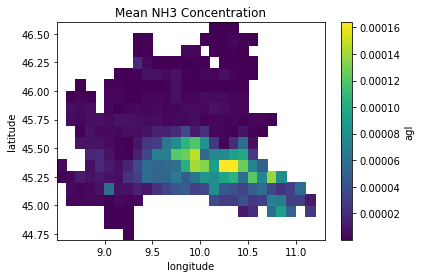

In [44]:
nh3.mean(dim='time').plot()
plt.title('Average NH3 Concentration')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

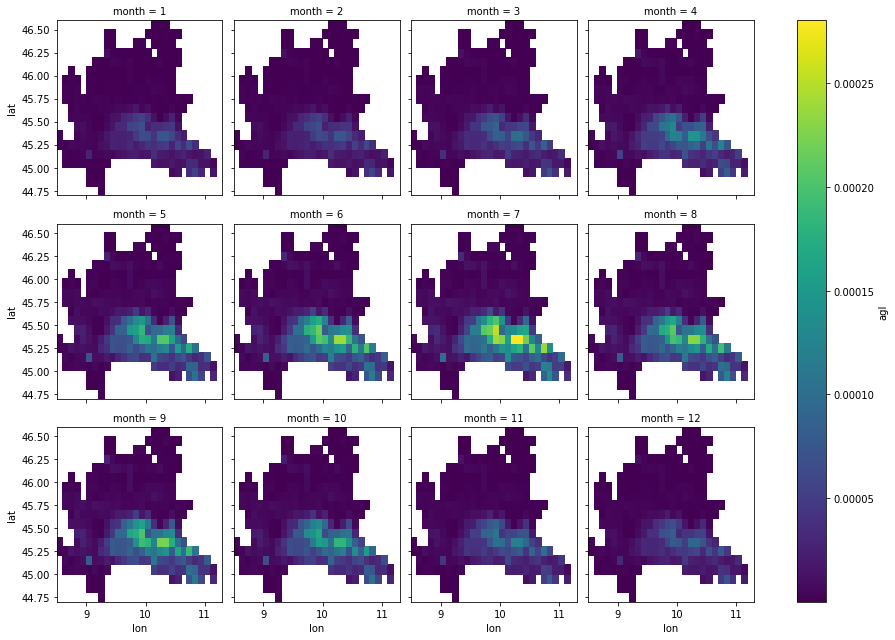

In [48]:
nh3.groupby('time.month').mean().plot(col='month', col_wrap=4)
plt.show()

In [51]:
shape = gpd.read_file('../resources/regione/regione_2015.shp')
shape.to_crs(epsg=4326, inplace=True)

In [54]:
# find the point with the max average NH3 concentration
max_coords = nh3.mean(dim='time').argmax(dim=['lat', 'lon'])
max_lat = max_coords['lat'].values
max_lon = max_coords['lon'].values

lats = [round(lat, 2) for lat in nh3.lat.to_series().tolist()]
lons = [round(lon, 2) for lon in nh3.lon.to_series().tolist()]

In [70]:
min_coords = nh3.mean(dim='time').argmin(dim=['lat', 'lon'])
min_lat = min_coords['lat'].values
min_lon = min_coords['lon'].values

In [67]:
mean_values = nh3.mean(dim='time')
mean_value = np.mean(mean_values)
epsilon = 1e-5

mean_coords = []

for lat_idx, lat in enumerate(mean_values.lat.to_series().tolist()):
    for lon_idx, lon in enumerate(mean_values.lat.to_series().tolist()):

        if not np.isnan(mean_values[lat_idx, lon_idx]):

            if np.absolute(float(mean_values[lat_idx, lon_idx].values) - float(mean_value)) < epsilon:
                mean_coords = (lat_idx, lon_idx)
                break

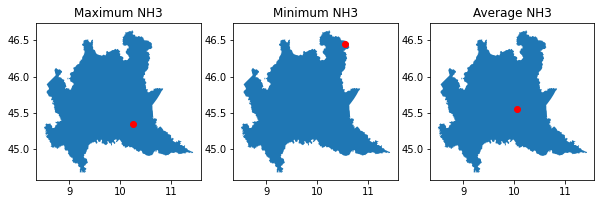

In [74]:
fig, axs = plt.subplots(1, 3, figsize=(10, 20))

shape.plot(ax=axs[0])
axs[0].scatter(lons[max_lon], lats[max_lat], c='r')
axs[0].set_title('Maximum NH3')

shape.plot(ax=axs[1])
axs[1].scatter(lons[min_lon], lats[min_lat], c='r')
axs[1].set_title('Minimum NH3')

shape.plot(ax=axs[2])
axs[2].scatter(lons[mean_coords[0]], lats[mean_coords[1]], c='r')
axs[2].set_title('Average NH3')

plt.show()

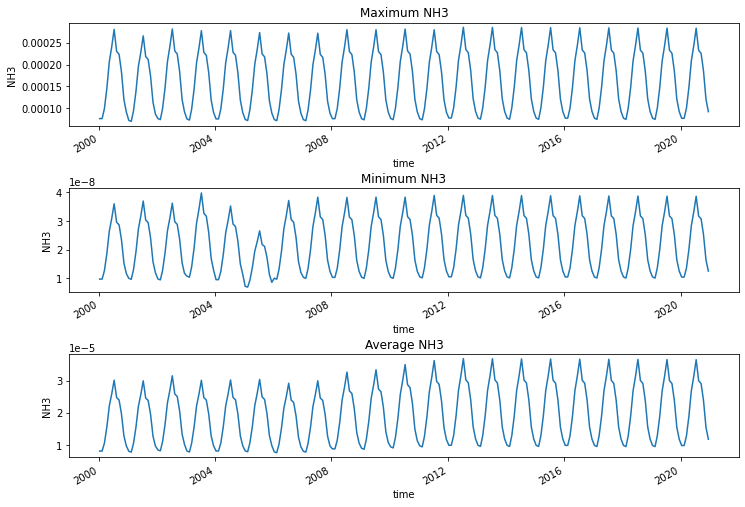

In [92]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

nh3[:, max_lat, max_lon].plot(ax=axs[0])
axs[0].set_title('Maximum NH3')
axs[0].set_ylabel('NH3')

nh3[:, min_lat, min_lon].plot(ax=axs[1])
axs[1].set_title('Minimum NH3')
axs[1].set_ylabel('NH3')

nh3[:, mean_coords[0], mean_coords[1]].plot(ax=axs[2])
axs[2].set_title('Average NH3')
axs[2].set_ylabel('NH3')

fig.subplots_adjust(hspace=0.6)

plt.show()

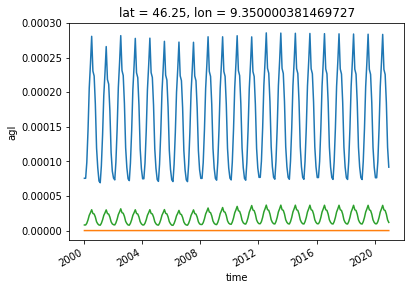

In [93]:
plt.figure()

nh3[:, max_lat, max_lon].plot()
nh3[:, min_lat, min_lon].plot()
nh3[:, mean_coords[0], mean_coords[1]].plot()

plt.title('NH3 Time Series Classes')
plt.show()